In [2]:
from IPython.display import Image

In [3]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/12_02.png', width=500)

In [5]:
import torch
import numpy as np

In [6]:
torch.__version__

'2.2.1+cu121'

In [7]:
a = [1,2,3]
b = np.array([4,5,6], dtype = np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [9]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [10]:
t_ones = torch.ones(2,3)
t_ones.shape

torch.Size([2, 3])

In [11]:
t_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [12]:
rand_tensor =  torch.rand(2,3)
print(rand_tensor)

tensor([[0.0445, 0.8446, 0.7470],
        [0.4664, 0.6242, 0.7532]])


In [15]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [19]:
t = torch.rand(3,5)
t_tr = torch.transpose(t, 0,1)
print(t.shape,'-->',t_tr.shape)

torch.Size([3, 5]) --> torch.Size([5, 3])


In [23]:
t = torch.zeros(30)
t_reshape =  t.reshape(5,6)
t_reshape.shape

torch.Size([5, 6])

In [26]:
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t, 2)
print(t.shape,'-->',t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


In [29]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) - 1
t2 = torch.normal(mean=0, std=1, size=(5,2))
t1, t2

(tensor([[ 0.5153, -0.4414],
         [-0.1939,  0.4694],
         [-0.9414,  0.5997],
         [-0.2057,  0.5087],
         [ 0.1390, -0.1224]]),
 tensor([[ 0.8590,  0.7056],
         [-0.3406, -1.2720],
         [-1.1948,  0.0250],
         [-0.7627,  1.3969],
         [-0.3245,  0.2879]]))

In [31]:
t1 * t2,  torch.multiply(t1, t2)

(tensor([[ 0.4426, -0.3114],
         [ 0.0660, -0.5970],
         [ 1.1249,  0.0150],
         [ 0.1569,  0.7107],
         [-0.0451, -0.0352]]),
 tensor([[ 0.4426, -0.3114],
         [ 0.0660, -0.5970],
         [ 1.1249,  0.0150],
         [ 0.1569,  0.7107],
         [-0.0451, -0.0352]]))

In [33]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [34]:
t5 = torch.matmul(t1,torch.transpose(t2,0,1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


파이토치 입력 파이프라인 구축

In [35]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)
data_loader

In [36]:
[item for item in data_loader]

[tensor([0.]),
 tensor([1.]),
 tensor([2.]),
 tensor([3.]),
 tensor([4.]),
 tensor([5.])]

In [49]:
data_loader = DataLoader(t,batch_size=3, drop_last = False)
for i,batch in enumerate(data_loader,1):
  print(f'배치 {i} : {batch}')

배치 1 : tensor([0., 1., 2.])
배치 2 : tensor([3., 4., 5.])


두 개의 텐서를 하나의 데이터셋으로 연결

In [43]:
from torch.utils.data import Dataset
class JoinDataset(Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y
  def __len__(self):
    return len(self.x)
  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [47]:
torch.manual_seed(1)
t_x = torch.rand([4,3], dtype = torch.float32)
t_y = torch.arange(4)
joint_dataset = JoinDataset(t_x, t_y)
print(t_x)
print(t_y)
for data in joint_dataset:
  print(f"x : {data[0]}   y: {data[1]}")

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])
tensor([0, 1, 2, 3])
x : tensor([0.7576, 0.2793, 0.4031])   y: 0
x : tensor([0.7347, 0.0293, 0.7999])   y: 1
x : tensor([0.3971, 0.7544, 0.5695])   y: 2
x : tensor([0.4388, 0.6387, 0.5247])   y: 3


In [48]:
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)
for data in joint_dataset:
  print(f"x : {data[0]}   y: {data[1]}")

x : tensor([0.7576, 0.2793, 0.4031])   y: 0
x : tensor([0.7347, 0.0293, 0.7999])   y: 1
x : tensor([0.3971, 0.7544, 0.5695])   y: 2
x : tensor([0.4388, 0.6387, 0.5247])   y: 3


셔플, 배치, 반복

In [53]:
torch.manual_seed(1)
data_loader = DataLoader(dataset = joint_dataset, batch_size=2, shuffle = True)
for i, batch in enumerate(data_loader,1):
  print(f"배치{i}  x:{batch[0]}  y:{batch[1]}")


배치1  x:tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]])  y:tensor([2, 0])
배치2  x:tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]])  y:tensor([1, 3])


In [54]:
for epoch in range(2):
  print(f"epoch {epoch+1}")
  for i, batch in enumerate(data_loader, 1):
    print(f"배치{i}  x:{batch[0]}  y:{batch[1]}")

epoch 1
배치1  x:tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]])  y:tensor([0, 2])
배치2  x:tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]])  y:tensor([1, 3])
epoch 2
배치1  x:tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]])  y:tensor([3, 2])
배치2  x:tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]])  y:tensor([0, 1])


In [63]:
!wget https://github.com/leekyuyoung20231211/python/raw/main/data/cat_dog_images.tar.gz

--2024-03-15 12:10:31--  https://github.com/leekyuyoung20231211/python/raw/main/data/cat_dog_images.tar.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/cat_dog_images.tar.gz [following]
--2024-03-15 12:10:31--  https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/cat_dog_images.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965517 (943K) [application/octet-stream]
Saving to: ‘cat_dog_images.tar.gz’

cat_dog_images.tar. 100%[===================>] 942.89K  --.-KB/s    in 0.05s   

2024-03-15 12:10:31 (19.2 MB/s) - ‘cat_dog_images.ta

In [64]:
!tar -xvzf cat_dog_images.tar.gz

cat_dog_images/
cat_dog_images/dog-02.jpg
cat_dog_images/dog-03.jpg
cat_dog_images/dog-01.jpg
cat_dog_images/cat-02.jpg
cat_dog_images/cat-03.jpg
cat_dog_images/cat-01.jpg


In [66]:
from glob import glob
file_list = glob('/content/cat_dog_images/*.jpg')
file_list

['/content/cat_dog_images/dog-02.jpg',
 '/content/cat_dog_images/dog-01.jpg',
 '/content/cat_dog_images/cat-01.jpg',
 '/content/cat_dog_images/cat-03.jpg',
 '/content/cat_dog_images/cat-02.jpg',
 '/content/cat_dog_images/dog-03.jpg']

image shape: (800, 1200, 3)
image shape: (800, 1200, 3)
image shape: (900, 1200, 3)
image shape: (900, 742, 3)
image shape: (900, 1200, 3)
image shape: (900, 1200, 3)


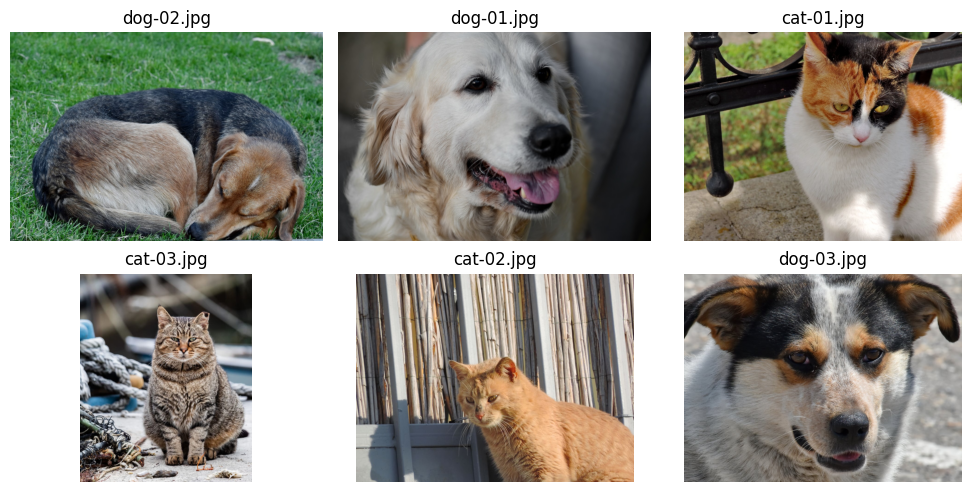

In [69]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list,1):
  img = Image.open(file)
  print('image shape:', np.array(img).shape)
  ax = fig.add_subplot(2,3,i)
  ax.imshow(img)
  ax.set_title(file.split('/')[-1])
  ax.set_axis_off()
plt.tight_layout()
plt.show()

In [72]:
# 라벨링 작업  dog 1  cat 0
labels = [  1 if 'dog' in file.split('/')[-1] else 0  for file in file_list]
labels

[1, 1, 0, 0, 0, 1]

기본 데이터셋 만들기

In [74]:
class ImageDataset(Dataset):
  def __init__(self,file_list, labels) -> None:
    self.file_list = file_list
    self.labels = labels
  def __getitem__(self, index):
    file = self.file_list[index]
    label = self.labels[index]
    return file,label
  def __len__(self):
    return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
  print(file,label)

/content/cat_dog_images/dog-02.jpg 1
/content/cat_dog_images/dog-01.jpg 1
/content/cat_dog_images/cat-01.jpg 0
/content/cat_dog_images/cat-03.jpg 0
/content/cat_dog_images/cat-02.jpg 0
/content/cat_dog_images/dog-03.jpg 1


이미지 변환

In [108]:
import torchvision.transforms as transforms
class ImageDataset(Dataset):
  def __init__(self,file_list, labels,transform=None) -> None:
    self.file_list = file_list
    self.labels = labels
    self.transform = transform

  def __getitem__(self, index):
    img = Image.open(self.file_list[index])
    if self.transform is not None:
      img = self.transform(img)
    label = self.labels[index]
    return img,label
  def __len__(self):
    return len(self.labels)

In [109]:
transfom =  transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize( (80,120))
])

image_dataset =  ImageDataset(file_list,labels,transform=transfom)

In [125]:
# Image.open('/content/cat_dog_images/dog-02.jpg')

for i, (imgfile,label) in enumerate(image_dataset):
  ax = fig.add_subplot(2,3,i+1)

  imgfile = imgfile.numpy().transpose((1,2,0))
  print(imgfile.shape)
  ax.imshow(imgfile.astype(int))
  ax.set_title(label)
  ax.set_axis_off()
plt.tight_layout()
plt.show()

(80, 120, 3)
(80, 120, 3)
(80, 120, 3)
(80, 120, 3)
(80, 120, 3)
(80, 120, 3)


<Figure size 640x480 with 0 Axes>